In [3]:
# !pip install torch
# !pip install torchvision
# !pip install matplotlib

  Using cached typing_extensions-4.9.0-py3-none-any.whl (32 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl (133 kB)
  Using cached filelock-3.13.1-py3-none-any.whl (11 kB)
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached fsspec-2024.2.0-py3-none-any.whl (170 kB)
  Using cached MarkupSafe-2.1.5-cp310-cp310-win_amd64.whl (17 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


You should consider upgrading via the 'D:\projects\torch_vgg16_sample\venv\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached pillow-10.2.0-cp310-cp310-win_amd64.whl (2.6 MB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached certifi-2024.2.2-py3-none-any.whl (163 kB)
  Using cached idna-3.6-py3-none-any.whl (61 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-win_amd64.whl (100 kB)


You should consider upgrading via the 'D:\projects\torch_vgg16_sample\venv\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.49.0-cp310-cp310-win_amd64.whl (2.2 MB)
  Using cached kiwisolver-1.4.5-cp310-cp310-win_amd64.whl (56 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)


You should consider upgrading via the 'D:\projects\torch_vgg16_sample\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from PIL import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

img_size = (256, 256)

In [4]:
print(device)

cpu


In [5]:
def read_image(image_path):
    pipeline = transforms.Compose(
        [transforms.Resize((img_size)),
         transforms.ToTensor()])

    img = Image.open(image_path)
    img = pipeline(img).unsqueeze(0)
    return img.to(device, torch.float)


def save_image(tensor, image_path):
    toPIL = transforms.ToPILImage()
    img = tensor.detach().cpu().clone()
    img = img.squeeze(0)
    img = toPIL(img)
    img.save(image_path)


In [16]:
target_img = read_image('./content/dalian.jpeg')

input_img = torch.randn(1, 3, *img_size, device=device)
input_img.requires_grad_(True)

optimizer = optim.LBFGS([input_img])
steps = 0

output_img_list = list()

while steps < 10:
    def closure():
        global steps
        optimizer.zero_grad()
        loss = F.mse_loss(input_img, target_img)
        loss.backward()
        steps += 1
        print(f'Step {steps}: Loss: {loss}')
        output_img_list.append(input_img.clone().detach())
        return loss
    optimizer.step(closure)

# save_image(input_img, './work/output.jpg')

Step 1: Loss: 1.3550769090652466
Step 2: Loss: 1.3550621271133423
Step 3: Loss: 1.3550344705581665
Step 4: Loss: 3.505044151097536e-05
Step 5: Loss: 9.354331680999986e-14
Step 6: Loss: 9.354331680999986e-14
Step 7: Loss: 9.354331680999986e-14
Step 8: Loss: 9.354331680999986e-14
Step 9: Loss: 9.354331680999986e-14
Step 10: Loss: 9.354331680999986e-14


In [21]:
for img in output_img_list:
    img = img.squeeze(0).permute(1, 2, 0).numpy()
    print(img.shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

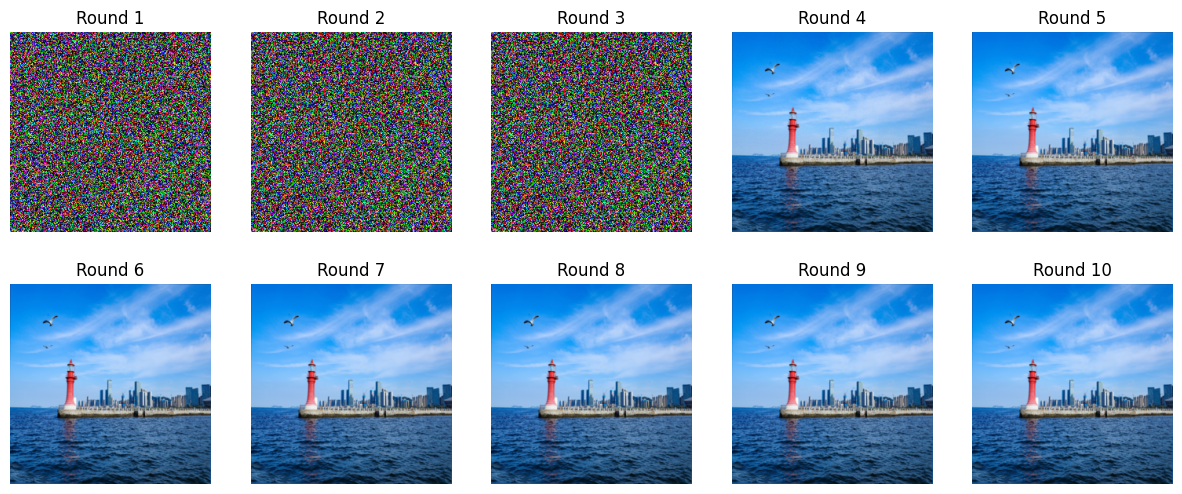

In [25]:
from PIL import Image
import matplotlib.pyplot as plt

num_images = len(output_img_list)
num_rows = (num_images + 2) // 5
num_cols = min(num_images, 5) 

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

for i, img in enumerate(output_img_list):
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    axs[row_idx, col_idx].imshow(img.squeeze(0).permute(1, 2, 0).numpy())
    axs[row_idx, col_idx].axis('off')
    axs[row_idx, col_idx].set_title(f'Round {i+1}')

plt.show()